In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zp
import wrds
import time
import pickle
from sklearn.decomposition import PCA

In [ ]:
#Open the zip file in context manager
with zp.ZipFile('Data.zip', 'r') as myzip:
    #List the files in the zip file
    # myzip.printdir()
    # Save printdir to a variable
    files = myzip.namelist()


In [ ]:
files_sorted = sorted(files[3:])
files_from_1970 = files_sorted[551:]
files_from_1970

['monthly_data/data_for_month_19700130.csv',
 'monthly_data/data_for_month_19700227.csv',
 'monthly_data/data_for_month_19700331.csv',
 'monthly_data/data_for_month_19700430.csv',
 'monthly_data/data_for_month_19700529.csv',
 'monthly_data/data_for_month_19700630.csv',
 'monthly_data/data_for_month_19700731.csv',
 'monthly_data/data_for_month_19700831.csv',
 'monthly_data/data_for_month_19700930.csv',
 'monthly_data/data_for_month_19701030.csv',
 'monthly_data/data_for_month_19701130.csv',
 'monthly_data/data_for_month_19701231.csv',
 'monthly_data/data_for_month_19710129.csv',
 'monthly_data/data_for_month_19710226.csv',
 'monthly_data/data_for_month_19710331.csv',
 'monthly_data/data_for_month_19710430.csv',
 'monthly_data/data_for_month_19710528.csv',
 'monthly_data/data_for_month_19710630.csv',
 'monthly_data/data_for_month_19710730.csv',
 'monthly_data/data_for_month_19710831.csv',
 'monthly_data/data_for_month_19710930.csv',
 'monthly_data/data_for_month_19711029.csv',
 'monthly_

In [ ]:
all_data_from_csv = pd.DataFrame()
with zp.ZipFile('Data.zip', 'r') as myzip:
        # Check if 'data.csv' exists in the zip file
    for file in files_from_1970:
    # Read the CSV file directly from the zip archive
        print(file)
        with myzip.open(f"{file}") as f:
            df = pd.read_csv(f)
            # print(df.head())
            all_data_from_csv = pd.concat([all_data_from_csv, df], ignore_index=True)
        print(f"File {file} read successfully.")

monthly_data/data_for_month_19700130.csv
File monthly_data/data_for_month_19700130.csv read successfully.
monthly_data/data_for_month_19700227.csv
File monthly_data/data_for_month_19700227.csv read successfully.
monthly_data/data_for_month_19700331.csv
File monthly_data/data_for_month_19700331.csv read successfully.
monthly_data/data_for_month_19700430.csv
File monthly_data/data_for_month_19700430.csv read successfully.
monthly_data/data_for_month_19700529.csv
File monthly_data/data_for_month_19700529.csv read successfully.
monthly_data/data_for_month_19700630.csv
File monthly_data/data_for_month_19700630.csv read successfully.
monthly_data/data_for_month_19700731.csv
File monthly_data/data_for_month_19700731.csv read successfully.
monthly_data/data_for_month_19700831.csv
File monthly_data/data_for_month_19700831.csv read successfully.
monthly_data/data_for_month_19700930.csv
File monthly_data/data_for_month_19700930.csv read successfully.
monthly_data/data_for_month_19701030.csv
File 

### Carry on Analysis with the CSV data

In [ ]:
all_data_from_csv.rename(columns={'DATE':'date', 'RET':'ret'}, inplace=True)

In [ ]:
all_data_no_duplicates = all_data_from_csv.drop_duplicates(subset=['date','permno'])

In [ ]:
#Drop the observations which have more than 60 missing values across the columns
all_data_no_duplicates.dropna(axis=0, thresh=60, inplace=True)

(array([2072., 2064., 1933., 1770., 1587., 1339., 1054., 1007.,  877.,
         853.,  709.,  636.,  582.,  564.,  491.,  442.,  396.,  367.,
         346.,  310.,  257.,  268.,  300.,  212.,  256.,  212.,  162.,
         152.,  110.,  136.,  100.,  130.,   99.,   52.,   75.,   56.,
          68.,   64.,   37.,   39.,   36.,   23.,   19.,   30.,   33.,
         105.,   38.,   23.,   22.,  223.]),
 array([  1.  ,  13.22,  25.44,  37.66,  49.88,  62.1 ,  74.32,  86.54,
         98.76, 110.98, 123.2 , 135.42, 147.64, 159.86, 172.08, 184.3 ,
        196.52, 208.74, 220.96, 233.18, 245.4 , 257.62, 269.84, 282.06,
        294.28, 306.5 , 318.72, 330.94, 343.16, 355.38, 367.6 , 379.82,
        392.04, 404.26, 416.48, 428.7 , 440.92, 453.14, 465.36, 477.58,
        489.8 , 502.02, 514.24, 526.46, 538.68, 550.9 , 563.12, 575.34,
        587.56, 599.78, 612.  ]),
 <BarContainer object of 50 artists>)

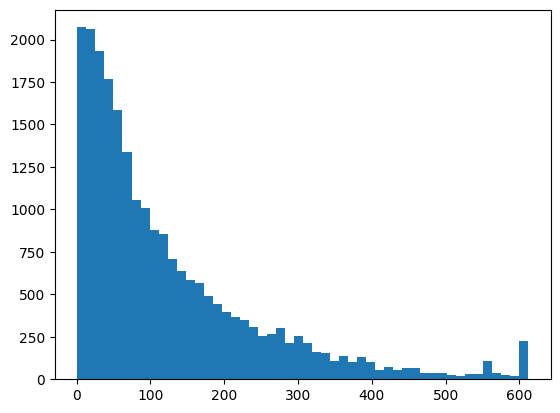

In [ ]:
#Plot a histogram of the number of non-missing monthly returns for each stock
plt.hist(all_data_no_duplicates.groupby('permno').count().ret, bins=50)

In [ ]:
# Drop the stocks which have less than 50 non-missing monthly returns
all_data_greater_50 = all_data_no_duplicates.groupby('permno').filter(lambda x: len(x) >= 50)
print(len(all_data_no_duplicates['permno'].unique()))
print(len(all_data_greater_50['permno'].unique()))

22736
14897


In [ ]:
#Final dataframe for PCA
all_data_greater_50.drop(columns=['Unnamed: 0'], inplace=True)
all_data_ret_only = all_data_greater_50[['permno','date','ret']].copy()
all_data_ret_only_pivoted = all_data_ret_only.pivot(index='date', columns='permno', values='ret')
# pd.to_pickle(all_data_ret_only, 'all_data_greater_50.pkl')
all_data_ret_only_pivoted

permno,10001,10002,10006,10009,10010,10011,10012,10014,10016,10018,...,93420,93422,93423,93426,93427,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
19700130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385965,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19700227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050633,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19700331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.160000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19700430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.317460,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19700529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.093023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.132187,-0.115646,0.249569,-0.021218,-0.039240,NaN,NaN,NaN,0.008584,0.741452
20200930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.495859,-0.305538,-0.065808,0.016459,-0.096733,NaN,NaN,NaN,0.055319,-0.139087
20201030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.642857,-0.003102,0.065025,-0.056477,-0.047755,NaN,NaN,NaN,-0.080645,-0.095499
